### import packages

In [45]:
import numpy as np
import pandas as pd
from numba import jit
from scipy.stats import norm
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

### Pricing Models to be considered:

##### 1. Binomial Trees

##### 2. Black-Scholes Model

##### 3. Heston?

##### 4. Monte Carlo (I have the code)

In [46]:
# use jit to improve compile speed
# @jit(nopython=True)  #thi an error if the function cannot be compiled.

def blackscholes(S0, K, T, r, sigma):
    """
    Price of a European call in the Black-Scholes model.
    """
    d1 = (np.log(S0)-np.log(K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return S0*norm.cdf(d1)-np.exp(-r*T)*K*norm.cdf(d2)

In [47]:
nasdaq_historical = yf.download('^IXIC', start='1990-01-01', end='2024-01-01')
nasdaq_historical['log_returns'] = np.log(nasdaq_historical['Adj Close'] / nasdaq_historical['Adj Close'].shift(1))
nasdaq_historical.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,log_returns
Date,,,,,,,
1990-01-02,452.899994,459.299988,452.700012,459.299988,459.299988,110720000,NaN
1990-01-03,461.100006,461.600006,460.000000,460.899994,460.899994,152660000,0.003478
1990-01-04,460.399994,460.799988,456.899994,459.399994,459.399994,147950000,-0.003260
1990-01-05,457.899994,459.399994,457.799988,458.200012,458.200012,137230000,-0.002615
1990-01-08,457.100006,458.700012,456.500000,458.700012,458.700012,115500000,0.001091


In [48]:
# calc the daily volatility of returns and use as a super naive volatility estimate
daily_vol = np.std(nasdaq_historical['log_returns'].dropna())
annualized_vol_naive = daily_vol * np.sqrt(252)

nasdaq_prices = nasdaq_historical['Adj Close']

Text(0, 0.5, 'Daily Price (Adjusted Closing)')

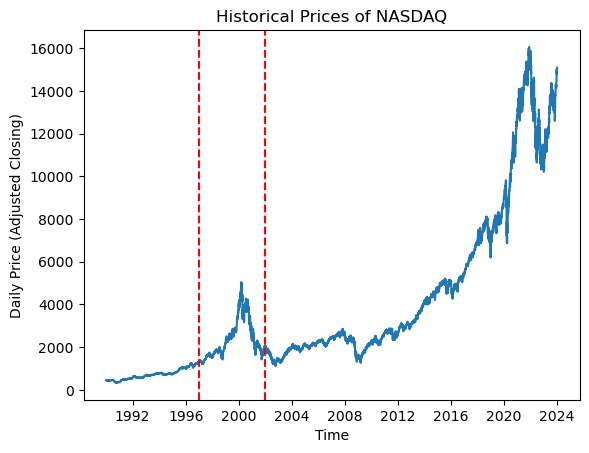

In [49]:
plt.plot(nasdaq_prices.index, nasdaq_prices)
plt.title("Historical Prices of NASDAQ")
plt.axvline(pd.Timestamp('1997-01-01'), color='red', linestyle='--', label='1996-01-02')
plt.axvline(pd.Timestamp('2002-01-02'), color='red', linestyle='--', label='2002-01-02')
plt.xlabel("Time")
plt.ylabel(("Daily Price (Adjusted Closing)"))

In [50]:
nasdaq_bubble = nasdaq_prices.loc['1997-01-01':'2003-01-01']
nasdaq_bubble_full = pd.DataFrame(nasdaq_bubble)

# just used generic values to show
nasdaq_bubble_full['K'] = nasdaq_bubble_full['Adj Close']
nasdaq_bubble_full['T'] = 1
nasdaq_bubble_full['Rf'] = 0.05 
nasdaq_bubble_full['sigma'] = annualized_vol_naive

In [51]:
bs_call_prices = []
for index, row in nasdaq_bubble_full.iterrows():
    S0 = row['Adj Close']
    K = row['K']
    T = row['T']
    r = row['Rf']
    sigma = row['sigma']

    bs_price = blackscholes(S0, K, T, r, sigma)
    bs_call_prices.append(bs_price)

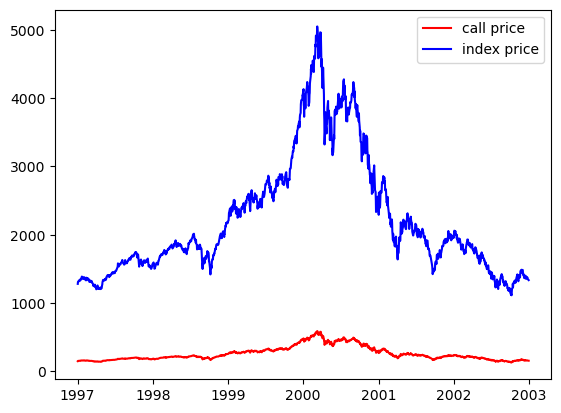

In [52]:
plt.plot(nasdaq_bubble_full.index, bs_call_prices, color='r', label='call price')
plt.plot(nasdaq_bubble_full['Adj Close'], color='b', label='index price')
plt.legend()

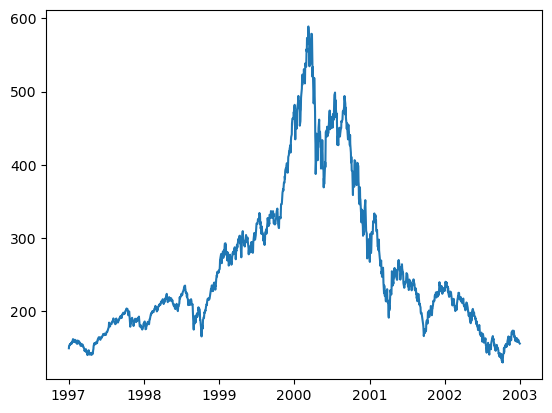

In [53]:
plt.plot(nasdaq_bubble_full.index, bs_call_prices)